In [ ]:
!pip install matplotlib
!pip install numpy

In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

# 1 Charger de la donnée

Dans ce notebook, nous allons étudier un dataset représentant la fréquentation quotidienne de 7 pistes cyclables Montréalaises en 2012.

Charger le dataset bikes.csv en utilisant la méthode `read_csv` de pandas. 

Jetez un coup d'oeil à la documentation => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [3]:
df = pd.read_csv("bikes.csv", encoding ="ISO-8859-1", sep = ';' )

Afficher les 3 premières lignes.

In [4]:
df.head(3)

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN


In [5]:
df.dtypes

Date                                    object
Berri 1                                  int64
Brébeuf (données non disponibles)      float64
Côte-Sainte-Catherine                    int64
Maisonneuve 1                            int64
Maisonneuve 2                            int64
du Parc                                  int64
Pierre-Dupuy                             int64
Rachel1                                  int64
St-Urbain (données non disponibles)    float64
dtype: object

Comme on peut le voir, le dataset n'est pas proprement chargé, toutes les colonnes sont reunies en une. Pour arranger ceci, nous allons utiiser quelques arguments de la méthode `read_csv`.

* changer le separateur de colonne a `;` avec l'option `sep`
* "Parser" la collone date avec l'option `parse_dates`
* Changer les dates pour avoir le jour et non le mois en premier
* Definir la colonne 'Date' comme index du dataframe avec `index_col`

In [16]:
df = pd.read_csv("bikes.csv", encoding ="ISO-8859-1", sep=';', parse_dates=True, index_col='Date')

In [17]:
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN


In [18]:
df.dtypes

Berri 1                                  int64
Brébeuf (données non disponibles)      float64
Côte-Sainte-Catherine                    int64
Maisonneuve 1                            int64
Maisonneuve 2                            int64
du Parc                                  int64
Pierre-Dupuy                             int64
Rachel1                                  int64
St-Urbain (données non disponibles)    float64
dtype: object

# 1.1 Sélection d'une colonne

On peut selectionner une colonne (ou plusieurs) d'un dataframe de la même manière que l'on slectionne une clé dans un dictionnaire :
`df['column_name']` or `df[['col1', 'col2', etc]]`

Selectionner la colonne 'Berri 1'

In [19]:
freq_berri = df['Berri 1']
freq_berri

Date
2012-01-01      35
2012-02-01      83
2012-03-01     135
2012-04-01     144
2012-05-01     197
              ... 
2012-01-11    2405
2012-02-11    1582
2012-03-11     844
2012-04-11     966
2012-05-11    2247
Name: Berri 1, Length: 310, dtype: int64

In [21]:
clean_data = df[['Berri 1', 'Côte-Sainte-Catherine', 'Maisonneuve 1', 'Maisonneuve 2', 'du Parc', 'Pierre-Dupuy', 'Rachel1' ]]
clean_data

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-02-01,83,1,68,153,53,6,43
2012-03-01,135,2,104,248,89,3,58
2012-04-01,144,1,116,318,111,8,61
2012-05-01,197,2,124,330,97,13,95
...,...,...,...,...,...,...,...
2012-01-11,2405,1208,1701,3082,2076,165,2461
2012-02-11,1582,737,1109,2277,1392,97,1888
2012-03-11,844,380,612,1137,713,105,1302


# 1.2 "Plotter" une colonne

Utiliser la méthode `.plot()` pour produire une graphique de la frequentation de la piste tout au long de l'année.

On remarque sans surprise que peu de gens prennent le vélo en hiver.

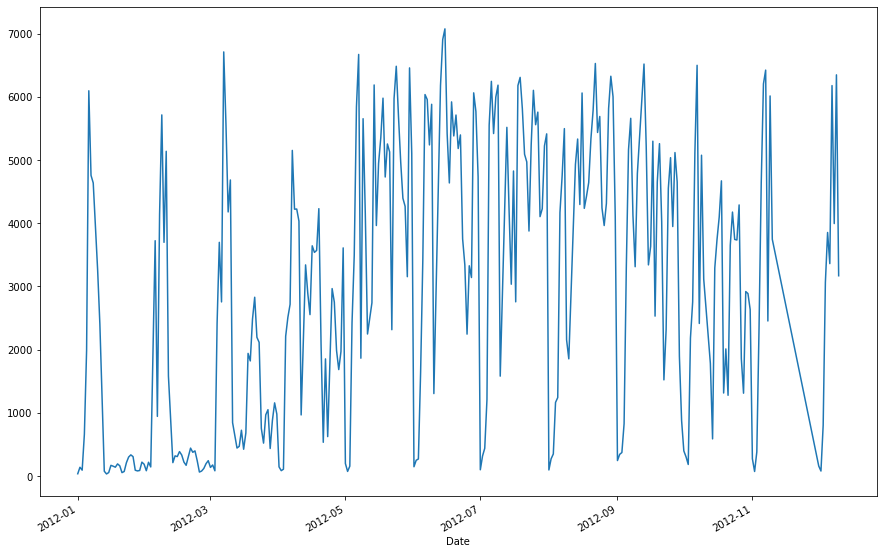

In [22]:
df['Berri 1'].plot()

On peut aussi plotter toutes les colonnes du dataframe en utilisant le même mechanisme.

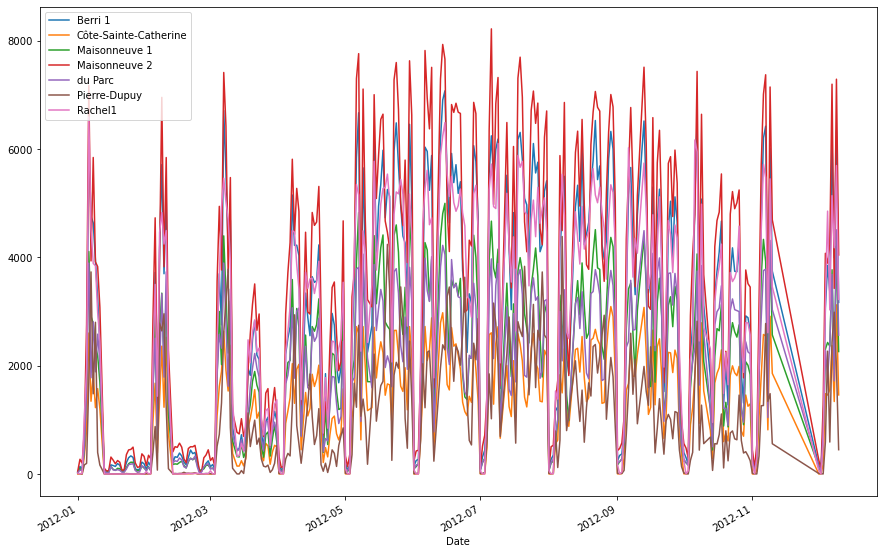

In [23]:
clean_data.plot()

Cependant, c'est un peu illisible... Utiliser l'option `subplots=True` pour séparer les courbes.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EA35FAB48>,
      dtype=object)

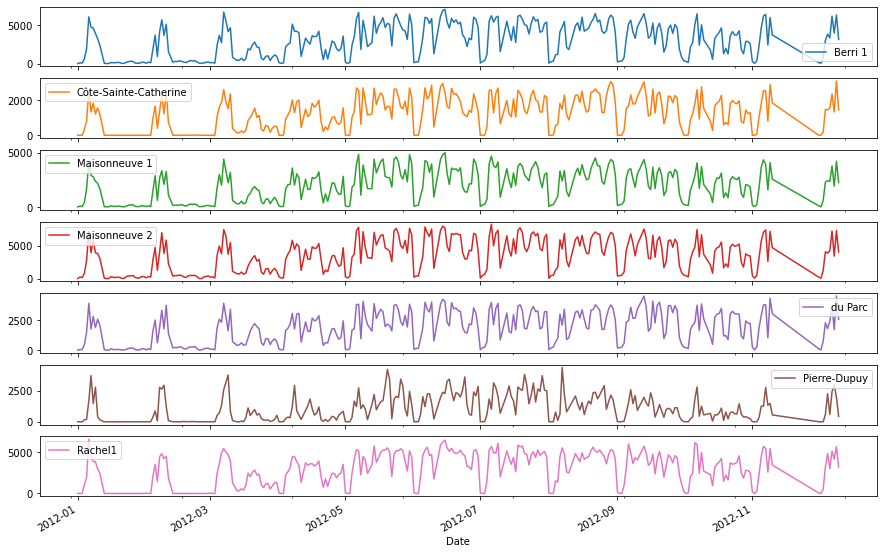

In [24]:
clean_data.plot(subplots=True)

# 2 Premières analyses

Dans cette partie nous allons utiliser un nouveau jeu de données plus volumineux, représentant les appels au service 311 de la ville de New York.

Charger le fichier '311-service-requests.csv' dans un dataframe pandas.

In [27]:
df = pd.read_csv('311-service-requests.csv', index_col='Unique Key')
df

c:\users\marie\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"


In [29]:
df.shape

(111069, 51)

# 2.1 Description du df

Explore the dataframe set with methods like .info(), .head(), .describe()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111069 entries, 26589651 to 26428033
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    111069 non-null  object 
 1   Closed Date                     60270 non-null   object 
 2   Agency                          111069 non-null  object 
 3   Agency Name                     111069 non-null  object 
 4   Complaint Type                  111069 non-null  object 
 5   Descriptor                      110613 non-null  object 
 6   Location Type                   79022 non-null   object 
 7   Incident Zip                    98807 non-null   object 
 8   Incident Address                84441 non-null   object 
 9   Street Name                     84432 non-null   object 
 10  Cross Street 1                  84728 non-null   object 
 11  Cross Street 2                  84005 non-null   object 
 12  Interse

# 2.2 Sélectionner des colonnes et des lignes

Selectionner la colonne 'Complaint Type'.

In [30]:
type_plainte = df['Complaint Type']

In [34]:
type_plainte.unique()

array(['Noise - Street/Sidewalk', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Vehicle', 'Rodent', 'Blocked Driveway',
       'Noise - House of Worship', 'Street Light Condition',
       'Harboring Bees/Wasps', 'Taxi Complaint', 'Homeless Encampment',
       'Traffic Signal Condition', 'Food Establishment', 'Noise - Park',
       'Broken Muni Meter', 'Benefit Card Replacement',
       'Sanitation Condition', 'ELECTRIC', 'PLUMBING', 'HEATING',
       'GENERAL CONSTRUCTION', 'Street Condition', 'Consumer Complaint',
       'Derelict Vehicles', 'Noise', 'Drinking', 'Indoor Air Quality',
       'Panhandling', 'Derelict Vehicle', 'Lead', 'Water System',
       'Noise - Helicopter', 'Homeless Person Assistance',
       'Root/Sewer/Sidewalk Condition', 'Sidewalk Condition', 'Graffiti',
       'DOF Literature Request', 'Animal in a Park',
       'Overgrown Tree/Branches', 'Air Quality', 'Dirty Conditions',
       'Water Quality', 'Other Enforcement', 'Collection Truck Noise',
     

Afficher les 5 premieres ligne de la colonne 'Complaint Type'.

In [35]:
type_plainte.head()

Unique Key
26589651    Noise - Street/Sidewalk
26593698            Illegal Parking
26594139         Noise - Commercial
26595721            Noise - Vehicle
26590930                     Rodent
Name: Complaint Type, dtype: object

# 2.3 Sélection de plusieurs colonnes

Afficher tous les noms de colonnes en utilisant l'attribut columns.values

In [36]:
df.columns.values

array(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1',
       'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Resolution Action Updated Date', 'Community Board',
       'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Termina

Créer un nouveaux dataset en selectionnant les colonnes 'Created Date', 'Closed Date', 'Complaint Type', 'Incident Address' et 'Street Name'

# 2.4 Quelles est la plainte qui revient le plus souvent?

Utiliser la méthode `.value_counts()` pour compter le nombre de plaintes pour chaque type de plainte.

In [69]:
count_plainte = type_plainte.value_counts()

In [70]:
type(count_plainte)

pandas.core.series.Series

utiliser la methode .sort() et afficher le top 10 des types de plainte avec le plus d'enregistremments.

In [71]:
data = count_plainte.sort_values(ascending=False).head(10)

In [72]:
type(data)

pandas.core.series.Series

Utiliser la méthose plot() pour produire un graphique en barre de ce top 10.

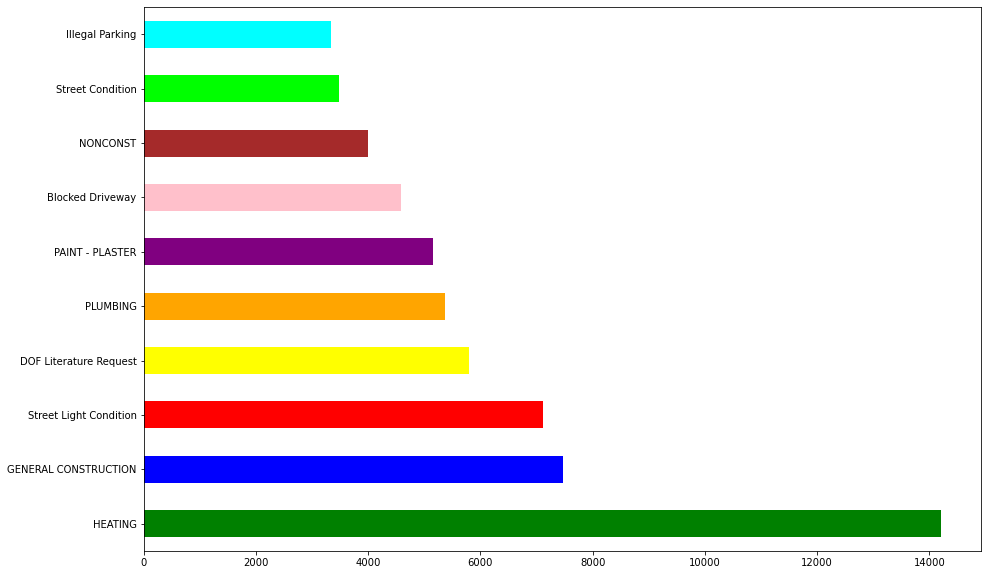

In [73]:
data.plot.barh(color=['green', 'blue', 'red', 'yellow', 'orange', 'purple', 'pink', 'brown', 'lime', 'cyan'])

In [ ]:
df2 = df

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  